In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [96]:
#
data = pd.read_csv('data/merge_all/merge_all.csv')

In [56]:
# data 에서 거래년월

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   전월비(%)          8370 non-null   float64
 3   평균              8370 non-null   float64
 4   거래량             8370 non-null   float64
dtypes: float64(4), object(1)
memory usage: 327.1+ KB


In [58]:
# 데이터 나누기
X = data[['자동차용 경유 가격 (원)', '전월비(%)', '거래량']]
y = data['평균']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    


In [68]:
# 데이터 정규화 하기
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [69]:
X_train

array([[ 1.73020078,  0.60845508, -0.62240597],
       [-1.71471051, -0.29130583, -0.51140789],
       [ 0.47248127, -0.29130583,  0.59930809],
       ...,
       [ 0.82186893, -1.19106674, -0.09142102],
       [-1.63340954,  0.37373484, -0.28280987],
       [ 0.26634852, -1.28886684,  2.64567209]])

In [70]:
X_test

array([[-0.34009368,  0.530215  ,  0.21788251],
       [ 0.42509193,  1.7233762 , -0.26396104],
       [ 1.11509045, -0.89766645,  1.48726752],
       ...,
       [ 0.60166069, -0.97590652,  0.18021003],
       [ 0.26634852, -1.28886684,  0.31915402],
       [ 0.16586357,  0.3346148 , -0.3364205 ]])

In [71]:
# 모델 만들기
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
# 예측
y_pred = model.predict(X_test)
        
# 평가
#print('MSE :', mean_squared_error(y_test, y_pred))
#print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
#print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))
#print('MSLE :', mean_squared_log_error(y_test, y_pred))

R2 : 0.904123174345869


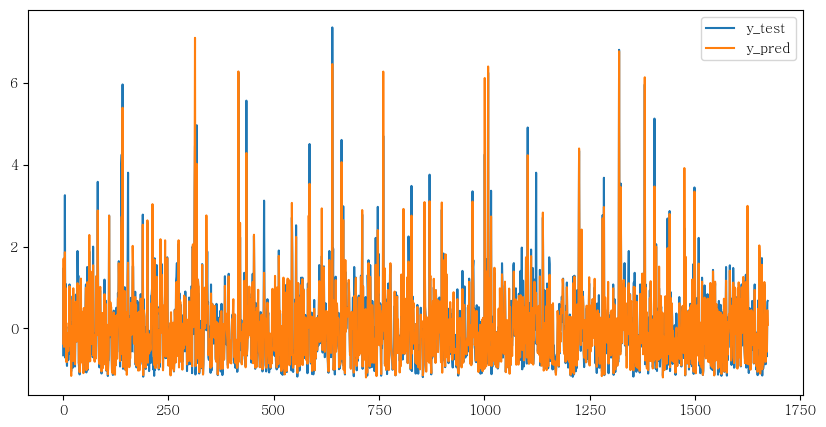

In [74]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

In [66]:
# data 로 LSTM 예측 모델 만들기


In [99]:
df = data
# scaler = MinMaxScaler()
# scale_cols = ['자동차용 경유 가격 (원)', '전월비(%)', '거래량']
# df_scaled = scaler.fit_transform(df[scale_cols])
# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols

df

,거래년월일,자동차용 경유 가격 (원),전월비(%),평균,거래량
0,2000-01-01,583.35,4.0,5600.0,102285.0
1,2000-01-02,583.35,4.0,5600.0,102285.0
2,2000-01-03,583.35,4.0,5600.0,102285.0
3,2000-01-04,583.35,4.0,5600.0,715338.0
4,2000-01-05,583.35,4.0,5620.0,340568.0
...,...,...,...,...,...
8365,2022-11-26,1879.15,-8.0,6100.0,296250.0
8366,2022-11-27,1879.15,-8.0,6100.0,296250.0
8367,2022-11-28,1879.15,-8.0,5664.0,201478.0
8368,2022-11-29,1879.15,-8.0,5592.0,77130.0


In [102]:
# df 에서 평균 컬럼만 iloc로 추출 (y값)
#df = df.iloc[:, 3:4].values
#df

# df 에서 평균 컬럼 제외하고 추출
df2 = df.iloc[:, 0:3]
df2

,거래년월일,자동차용 경유 가격 (원),전월비(%)
0,2000-01-01,583.35,4.0
1,2000-01-02,583.35,4.0
2,2000-01-03,583.35,4.0
3,2000-01-04,583.35,4.0
4,2000-01-05,583.35,4.0
...,...,...,...
8365,2022-11-26,1879.15,-8.0
8366,2022-11-27,1879.15,-8.0
8367,2022-11-28,1879.15,-8.0
8368,2022-11-29,1879.15,-8.0


In [86]:
# df에서 거래년월, 평균 제거
# df = df.drop(['거래년월일', '평균'], axis=1, inplace=True)
# df

In [78]:
# X = df_scaled
# y = df['평균']

In [79]:
# x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
# x_train.shape, x_valid.shape

((6696, 3), (1674, 3))

In [88]:
def normalize_data(dataset):
    cols = dataset.columns.tolist()
    col_name = [0]*len(cols)
    for i in range(len(cols)):
        col_name[i] = i
    dataset.columns = col_name
    dtypes = dataset.dtypes.tolist()
    minmax = list()
    for column in dataset:
        dataset = dataset.astype({column: 'float32'})
    for i in range(len(cols)):
        col_values = dataset[col_name[i]]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    for column in dataset:
        values = dataset[column].values
        for i in range(len(values)):
            values[i] = (values[i] - minmax[column][0]) / (minmax[column][1] - minmax[column][0])
        dataset[column] = values
    dataset[column] = values
    return dataset,minmax
    
dataset,minmax = normalize_data(df)
print(df.values)
values = dataset.values

[[ 5.83350e+02  4.00000e+00  1.02285e+05]
 [ 5.83350e+02  4.00000e+00  1.02285e+05]
 [ 5.83350e+02  4.00000e+00  1.02285e+05]
 ...
 [ 1.87915e+03 -8.00000e+00  2.01478e+05]
 [ 1.87915e+03 -8.00000e+00  7.71300e+04]
 [ 1.87915e+03 -8.00000e+00  1.19783e+05]]


In [ ]:
df 

In [ ]:
def split_sequences(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
    
def data_setup(n_steps, n_seq,sequence):
    X, y = split_sequences(sequence, n_steps)
    n_features = X.shape[2]
    X = X.reshape((len(X),n_steps, n_features))
    new_y = []
    for term in y:
        new_term = term[-1]
        new_y.append(new_term)
    return X, np.array(new_y), n_features
    
n_steps = 10
n_seq = 10000
rel_test_len = 0.1
X,y,n_features = data_setup(n_steps,n_seq,values)
X = X[:-1]
y = y[1:]
X_test,y_test = X[:int(len(X)*rel_test_len)],y[:int(len(X)*rel_test_len)]
X_train,y_train = X[int(len(X)*rel_test_len):],y[int(len(X)*rel_test_len):]
X.shape